In [41]:
import numpyro
import jax
import jax.numpy as np
from numpyro.contrib.autoguide import AutoDelta
from numpyro.infer.util import init_with_noise, init_to_value
import numpyro
from numpyro.infer import ELBO
import numpyro.distributions as dist
from numpyro.infer.stein import SVGD
from numpyro.infer.kernels import RBFKernel
from numpyro.optim import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

In [34]:
def funnel(dim=10):
    y = numpyro.sample('y', dist.Normal(0, 3))
    numpyro.sample('x', dist.Normal(np.zeros(dim - 1), np.exp(y / 2)))

In [69]:
dim = 10
rng_key = jax.random.PRNGKey(142)
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': np.array([0.]*(dim-1)), 'y': np.array([1.])}), noise_scale=1.0))
svgd = SVGD(funnel, guide, Adam(step_size=1e-4), ELBO(),
            RBFKernel(mode='vector'), num_stein_particles=1000, num_loss_particles=100)
svgd_state = svgd.init(rng_key)

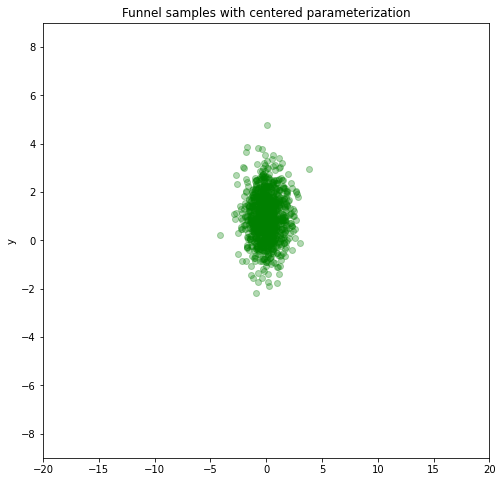

In [70]:
# make plots
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(svgd.get_params(svgd_state)['auto_x'][:, 0], svgd.get_params(svgd_state)['auto_y'], "go", alpha=0.3)
ax.set(xlim=(-20, 20), ylim=(-9, 9), ylabel='y', title='Funnel samples with centered parameterization')
plt.show()

<Figure size 432x288 with 0 Axes>